In [1]:
import numpy as np, local, binning as bn, plottools as pl
from matplotlib.pyplot import *

In [2]:
qids = ['boss_d01','boss_01','boss_d02','boss_02','boss_d03','boss_03','boss_d04','boss_04','s16_d01','s16_d02','s16_d03']
#qids = ['boss_d01','boss_d02','boss_02','s16_d01','s16_d02','s16_d03']
#qids = ['boss_d01','boss_d02','boss_d03','boss_d04','boss_01','boss_02','boss_03']
#qids = ['boss_d03','boss_d04']
#qids = ['s16_d02','s16_d03']

In [3]:
aobj = {q: local.init_analysis_params(qid=q,ascale=5.) for q in qids}
mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1] for q in qids}
ocl  = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1] for q in qids}

In [4]:
mcl0  = {q: (np.loadtxt(aobj[q].fcls['c'][1])).T[1] for q in qids}
ncl0  = {q: (np.loadtxt(aobj[q].fcls['n'][1])).T[1] for q in qids}
mcl1  = {q: (np.loadtxt(aobj[q].fcls['c'][20])).T[1] for q in qids}
ncl1  = {q: (np.loadtxt(aobj[q].fcls['n'][20])).T[1] for q in qids}

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


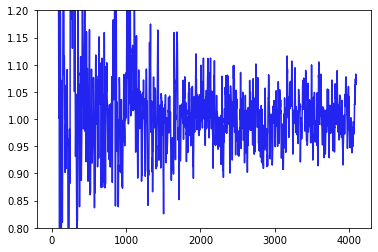

In [5]:
ylim(0.8,1.2)
plot(ncl0['boss_04']/ncl1['boss_04'])

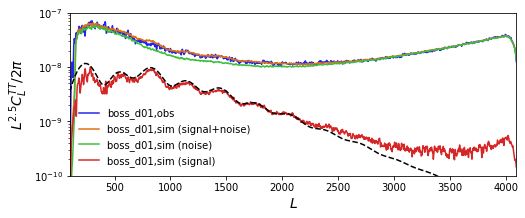

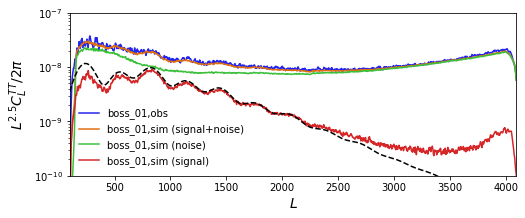

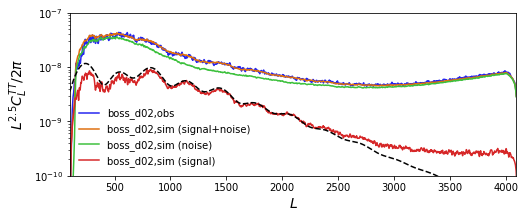

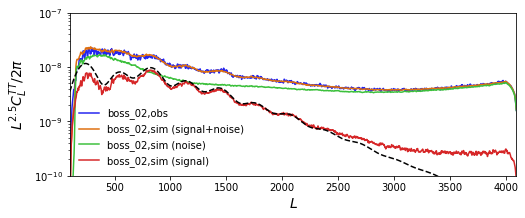

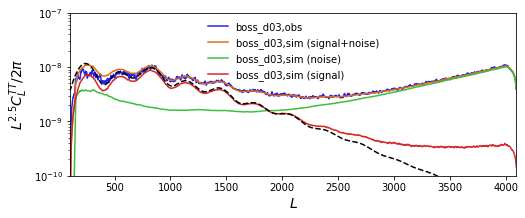

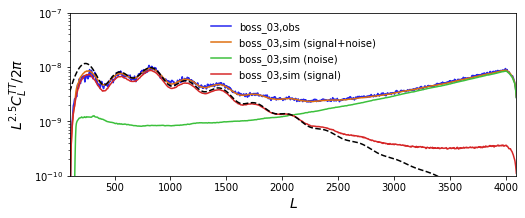

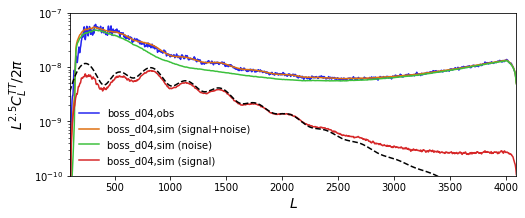

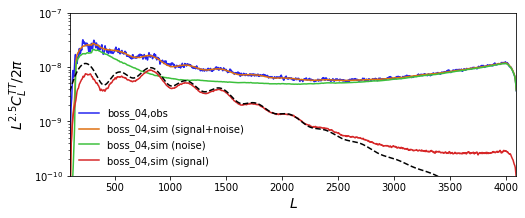

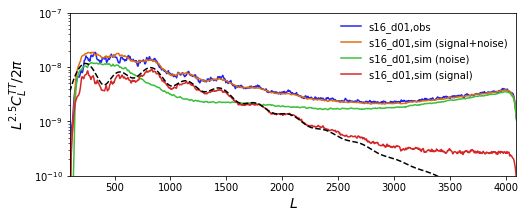

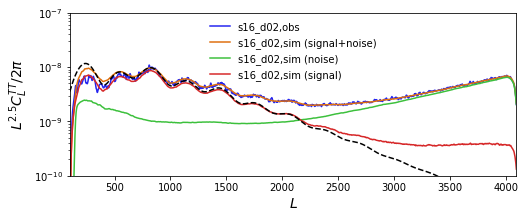

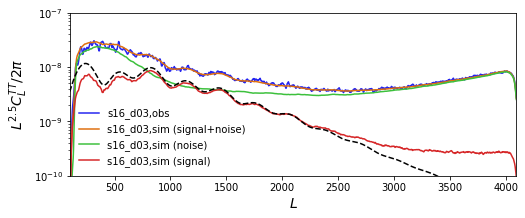

In [6]:
for q in qids:
    pl.plot_1dstyle(fsize=[8,3],xmin=100,xmax=4096,ymin=1e-10,ymax=1e-7,xlab=r'$L$',ylab=r'$L^{2.5} C^{TT}_L/2\pi$',ylog=True)
    l = aobj[q].l
    s = l**2.5/2./np.pi
    plot(l,s*ocl[q],label=q+',obs')
    plot(l,s*mcl[q],label=q+',sim (signal+noise)')
    plot(l,s*ncl[q],label=q+',sim (noise)')
    plot(l,s*(mcl[q]-ncl[q]),label=q+',sim (signal)')
    plot(l,s*aobj[q].lcl[0,:],color='k',ls='--')
    legend()
    show()

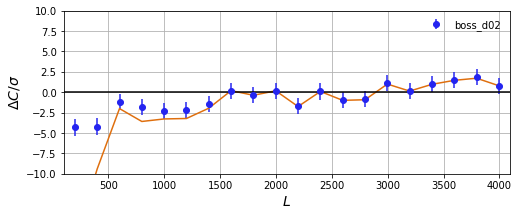

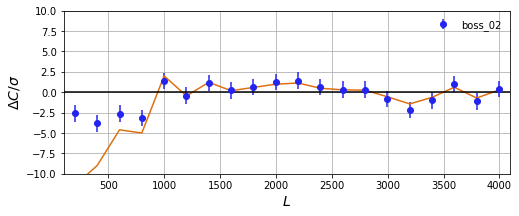

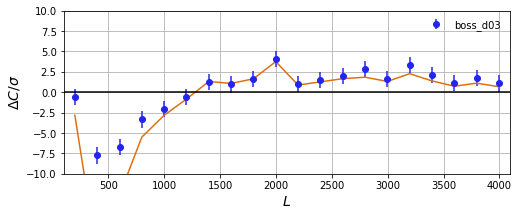

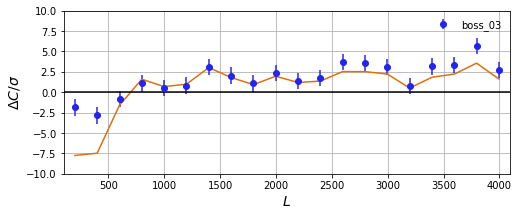

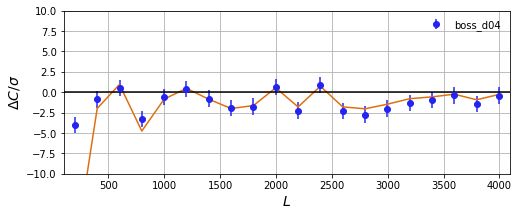

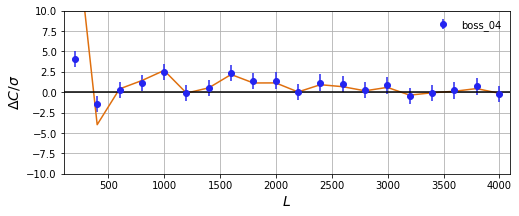

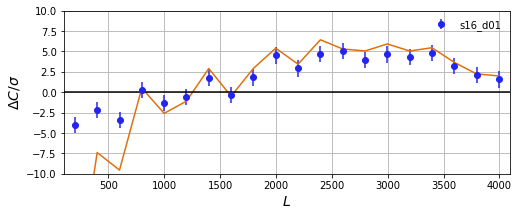

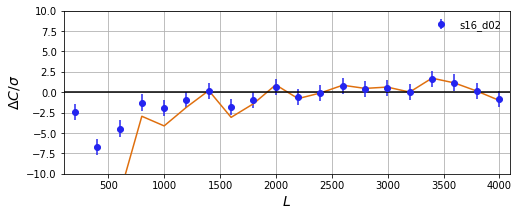

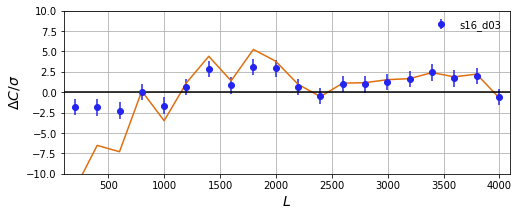

<Figure size 576x216 with 0 Axes>

In [7]:
mb = bn.multipole_binning(20,lmin=100,lmax=4096)
for q in qids:
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj[q].fcls['c'][:101],cn=1)
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-10,ymax=10,ylab=r'$\Delta C/\sigma$')
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=q)
    plot(mb.bc,100*(ocb/mcb-1))
    axhline(0,color='k')
    legend()
    show()
    clf()